In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Set 2 Model: Logistic Regression with Mean Texture, Worst Area, and Worst Smoothness

**Objective:** The model I'm working on has the following features selected ('mean texture', 'worst area', 'worst smoothness') to predict breast cancer diagnosis (malignant/benign) from the UCI Breast Cancer dataset.

**Methodology:**
*   **Features:** 'mean texture', 'worst area', 'worst smoothness'
*   **Model:** Logistic Regression implemented from scratch.
*   **Training:** Full-batch gradient descent.
*   **Loss Function:** Log Loss (Binary Cross-Entropy).
*   **Data Split:** 75% training, 25% testing.
*   **Evaluation Metric:** Accuracy Score.
*   **Initial Hyperparameters (can be varied):**
    *   Learning Rate: 0.25
    *   Epochs: 10

Starting model training...


Training complete.
Final trained weights (including bias): [ 0.24470197 -0.33575494 -0.63524737 -0.35317249]

Evaluating model on the test set...

Model Accuracy on Test Set for Set 2 (Mean Texture, Worst Area, Worst Smoothness): 0.9371


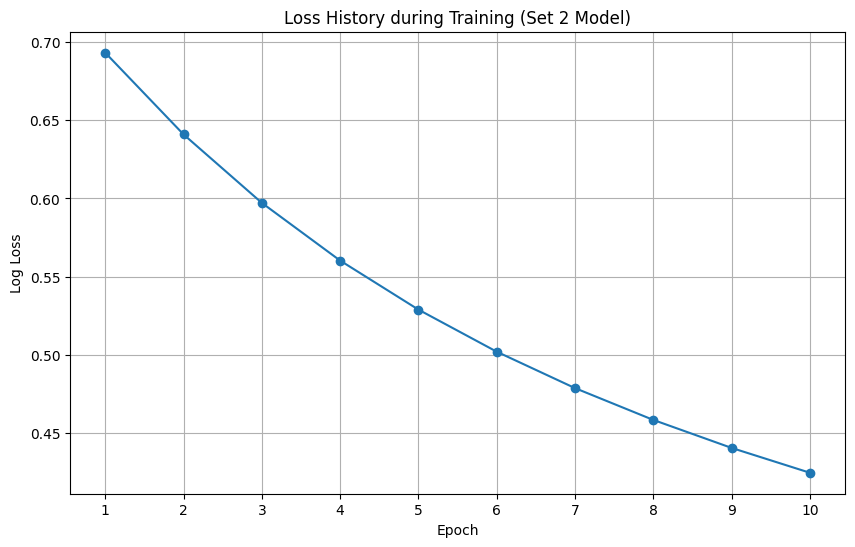


--- End of Set 2 Model ---


In [36]:

# Load the dataset
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target # 0 for malignant, 1 for benign

# set 2 features
features_set2 = ['mean texture', 'worst area', 'worst smoothness']
X = df[features_set2]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#intercept term (for bias) to the scaled features
X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

# 2. Logistic Regression Model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred_proba):
    epsilon = 1e-15  # Small constant to prevent log(0) or log(1) issues
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba)).mean()

def logistic_regression_train(X, y, learning_rate, epochs):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Initialize weights to zeros
    loss_history = []
    for epoch in range(epochs):
        # Linear combination of features and weights
        z = np.dot(X, weights)
        
        # Predicted probabilities using sigmoid function
        y_pred_proba = sigmoid(z)
        
        # Calculate loss
        current_loss = log_loss(y, y_pred_proba)
        loss_history.append(current_loss)
        
        # Calculate gradient (derivative of log loss w.r.t weights)
        # For full-batch, the gradient is the average over all samples
        gradient = np.dot(X.T, (y_pred_proba - y)) / num_samples
        
        # Update weights
        weights -= learning_rate * gradient
        
    return weights, loss_history

def predict_log_reg(X, weights):
    z = np.dot(X, weights)
    y_pred_proba = sigmoid(z)
    return (y_pred_proba >= 0.5).astype(int)

# 3. Train the Model
learning_rate = 0.25
epochs = 10

# Convert y_train to numpy array if it's a Pandas Series for consistency
y_train_values = y_train.values 

print("Starting model training...\n")
trained_weights, training_loss_history = logistic_regression_train(X_train_scaled, y_train_values, learning_rate, epochs)
print("\nTraining complete.")
print(f"Final trained weights (including bias): {trained_weights}")

# 4. Evaluate the Model
print("\nEvaluating model on the test set...")
y_pred_test = predict_log_reg(X_test_scaled, trained_weights)

# Convert y_test to numpy array if it's a Pandas Series
y_test_values = y_test.values

accuracy = accuracy_score(y_test_values, y_pred_test)
print(f'\nModel Accuracy on Test Set for Set 2 (Mean Texture, Worst Area, Worst Smoothness): {accuracy:.4f}')

# 5. Plot Loss History (Optional)
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), training_loss_history, marker='o', linestyle='-')
plt.title('Loss History during Training (Set 2 Model)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.xticks(range(1, epochs + 1))
plt.grid(True)
plt.show()

print("\n--- End of Set 2 Model ---")



### 6. Logistic Regression using Scikit-learn

In [37]:
from sklearn.linear_model import LogisticRegression

# so we use the scaled features without the manually added intercept column.
X_train_sklearn = scaler.transform(X_train)
X_test_sklearn = scaler.transform(X_test)

# Initialize and train the sklearn Logistic Regression model
# solver='liblinear' is often a good choice for small datasets.
sklearn_log_reg = LogisticRegression(random_state=42, solver='liblinear')

# Fit the model using the scaled training data and original y_train
sklearn_log_reg.fit(X_train_sklearn, y_train)

# Make predictions on the scaled test set
y_pred_test_sklearn = sklearn_log_reg.predict(X_test_sklearn)

# Evaluate the model
accuracy_sklearn = accuracy_score(y_test, y_pred_test_sklearn)

# intercept and coefficients
sklearn_weights_combined = np.hstack((sklearn_log_reg.intercept_, sklearn_log_reg.coef_[0]))

# --- Outputting in a similar format to the custom model ---
print(f"Final trained weights (including bias) from sklearn: {sklearn_weights_combined}")
print(f"Model Accuracy on Test Set for Set 2 ({', '.join(features_set2)}) using Sklearn: {accuracy_sklearn:.4f}")

print("\n--- End of Scikit-learn Logistic Regression Model (Formatted Output) ---")

Final trained weights (including bias) from sklearn: [ 0.23602613 -1.04109108 -4.91882231 -1.47954996]
Model Accuracy on Test Set for Set 2 (mean texture, worst area, worst smoothness) using Sklearn: 0.9720

--- End of Scikit-learn Logistic Regression Model (Formatted Output) ---


### 7. Neural Network Model using Keras/TensorFlow

Neural Network Model Summary:


/Users/jas/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)


Starting Neural Network model training...
Epoch 1/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.6974 - loss: 0.6378 - val_accuracy: 0.8605 - val_loss: 0.3463
Epoch 2/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.9345 - loss: 0.2836 - val_accuracy: 0.9535 - val_loss: 0.1859
Epoch 3/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.9534 - loss: 0.1693 - val_accuracy: 0.9767 - val_loss: 0.1351
Epoch 4/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9562 - loss: 0.1374 - val_accuracy: 0.9651 - val_loss: 0.1130
Epoch 5/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9680 - loss: 0.1337 - val_accuracy: 0.9884 - val_loss: 0.1083
Epoch 6/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.9846 - loss: 0.0836 - val_accuracy: 0.9884 - val_loss: 0.1056
Epoch 7/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9450 - loss: 0.1924 - val_accuracy: 0.9651 - val_loss: 0.0909
Epoch 8/25
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 433u

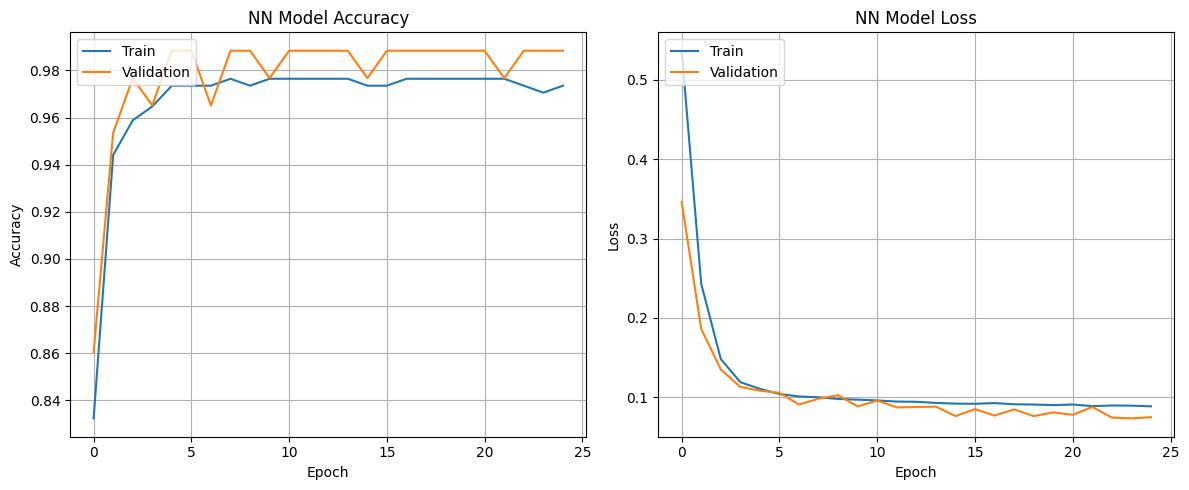


--- End of Neural Network Model (Keras/TensorFlow) ---


In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# neuralnet
nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_sklearn.shape[1],)), 
    Dense(8, activation='relu'),                                        
    Dense(1, activation='sigmoid')                                     
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Print model summary
print("Neural Network Model Summary:")
nn_model.summary()

# Train the model
epochs_nn = 25 # 
batch_size_nn = 1 # Can be adjusted
print("\nStarting Neural Network model training...")
history_nn = nn_model.fit(X_train_sklearn, y_train, 
                            epochs=epochs_nn, 
                            batch_size=batch_size_nn, 
                            validation_split=0.2,  # Use part of training data for validation during training
                            verbose=1) # Set to 0 for less output, 1 for progress bar
print("\nNeural Network Training complete.")

# Evaluate the model on the test set
print("\nEvaluating Neural Network model on the test set...")
loss_nn, accuracy_nn = nn_model.evaluate(X_test_sklearn, y_test, verbose=0)
print(f'\nModel Accuracy on Test Set for Set 2 (Neural Network): {accuracy_nn:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.title('NN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_nn.history['loss'])
plt.plot(history_nn.history['val_loss'])
plt.title('NN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- End of Neural Network Model (Keras/TensorFlow) ---")

### 8. Hyperparameter Tuning for Neural Network Model

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.9883720874786377

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 20s
KerasTuner search complete.

Best hyperparameters found: 
Input Units: 32
Hidden Units: 4
Learning Rate: 0.01
Optimizer: adam

Building the best model with optimal hyperparameters...

Retraining the best model on the full training data...
Epoch 1/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8576 - loss: 0.4445 - val_accuracy: 0.9186 - val_loss: 0.2606
Epoch 2/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.9633 - loss: 0.1903 - val_accuracy: 0.9535 - val_loss: 0.1547
Epoch 3/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9646 - loss: 0.1376 - val_accuracy: 0.9651 - val_loss: 0.1422
Epoch 4/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9426 - loss: 0.2064 - val_accuracy: 0.9535 - val_loss: 0.1041
Epoch 5/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.9727 - loss: 0.1088 - val_accuracy: 0.93

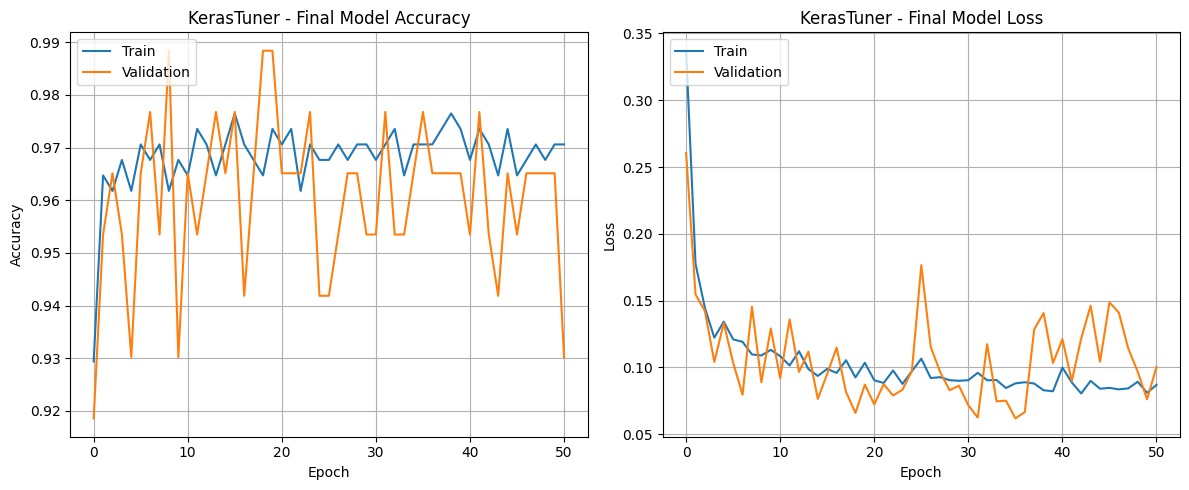


--- End of Neural Network Hyperparameter Tuning with KerasTuner ---


In [39]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported

# Ensure X_train_sklearn, y_train, X_test_sklearn, y_test are defined from previous cells

def build_model_kt(hp):
    model = Sequential()
    model.add(keras.Input(shape=(X_train_sklearn.shape[1],))) # Use keras.Input
    
    # Tune the number of units in the first Dense layer
    hp_units_input = hp.Int('units_input', min_value=8, max_value=32, step=8)
    model.add(Dense(units=hp_units_input, activation='relu'))
    
    # Tune the number of units in the second Dense layer
    hp_units_hidden = hp.Int('units_hidden', min_value=4, max_value=16, step=4)
    model.add(Dense(units=hp_units_hidden, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    
    # Tune the optimizer
    optimizer_name = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=hp_learning_rate)
    else:
        optimizer = RMSprop(learning_rate=hp_learning_rate)
        
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner (RandomSearch). 
# For a more exhaustive search, consider kt.Hyperband or kt.BayesianOptimization
tuner = kt.RandomSearch(
    build_model_kt,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try (e.g., 10-20)
    executions_per_trial=1, # Number of models to train per trial (e.g., 1-3 for robustness)
    directory='keras_tuner_dir', # Directory to store logs and checkpoints
    project_name='set2_nn_tuning',
    overwrite=True)

# Prepare y_train and y_test as NumPy arrays (good practice)
y_train_np_kt = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
y_test_np_kt = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.array(y_test)


print("Starting KerasTuner search...")
# Early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # Increased patience

# using keras tuner because of compatibility issues with scikit-learn and tf
tuner.search(X_train_sklearn, 
             y_train_np_kt, 
             epochs=50, # Epochs for each trial
             validation_split=0.2, 
             callbacks=[stop_early], 
             verbose=1)
print("KerasTuner search complete.")

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"\nBest hyperparameters found: ")
print(f"Input Units: {best_hps.get('units_input')}")
print(f"Hidden Units: {best_hps.get('units_hidden')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Optimizer: {best_hps.get('optimizer')}")
# If you tune batch_size with KerasTuner, print it: best_hps.get('batch_size')

# Build the model with the optimal hyperparameters
print("\nBuilding the best model with optimal hyperparameters...")
final_best_model = tuner.hypermodel.build(best_hps)

# Retrain the best model on the full training data (or a larger portion) for potentially more epochs
print("\nRetraining the best model on the full training data...")

final_epochs = 100 
final_batch_size = best_hps.get('batch_size') if 'batch_size' in best_hps.values else 1 # Use tuned batch_size or default to 1 or 32

history_final_best = final_best_model.fit(X_train_sklearn, 
                                          y_train_np_kt, 
                                          epochs=final_epochs, 
                                          batch_size=final_batch_size, # Apply best batch size if tuned, or a good default
                                          validation_split=0.2, 
                                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)], # Higher patience for final training
                                          verbose=1)
print("Final model training complete.")

# Evaluate the best model on the test set
loss_kt, accuracy_kt = final_best_model.evaluate(X_test_sklearn, y_test_np_kt, verbose=0)
print(f'\nModel Accuracy on Test Set for Set 2 (KerasTuner NN): {accuracy_kt:.4f}')

# Plot training & validation accuracy values for the final best model
if hasattr(history_final_best, 'history') and 'accuracy' in history_final_best.history:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history_final_best.history['accuracy'])
    plt.plot(history_final_best.history['val_accuracy'])
    plt.title('KerasTuner - Final Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)

    # Plot training & validation loss values for the final best model
    plt.subplot(1, 2, 2)
    plt.plot(history_final_best.history['loss'])
    plt.plot(history_final_best.history['val_loss'])
    plt.title('KerasTuner - Final Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Could not plot training history: history object not found or metrics missing.")

print("\n--- End of Neural Network Hyperparameter Tuning with KerasTuner ---")